In [1]:
import cv2

In [2]:
import os
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# print(os.curdir)
os.chdir(r"F:\git\mayun\python_memo\基本库测试\综合类\opencv\prj\valeo_gray")

In [5]:
# pathImage=r"F:\git\mayun\python_memo\基本库测试\综合类\opencv\prj\led_detect\VID_20240402_141337.mp4_20240408_135202.728.jpg"
pathImage=r"IMG_20240510_100651.jpg"

In [6]:
img = cv2.imread(pathImage)# 不能有中文

In [7]:
def showpic(imgdata):
    ''' 内部有 BGR->RGB '''
    plt.imshow(cv2.cvtColor(imgdata, cv2.COLOR_BGR2RGB))
    plt.show()
    
def showpicd(imgdata):
    ''' 不转换，直接显示'''
    plt.imshow(imgdata)
    plt.show()

def showpicRGB(imgdata,a=1,b=1,c=1):
    ''' 只显示某个通道，暂时报错'''
    # cv2.cvtColor(img, cv2.COLOR_BGR2)
    plt.imshow("blue", imgdata[:, :, 0])
    # plt.imshow("green", imgdata[:, :, 1])
    # plt.imshow("red", imgdata[:, :, 2])
    plt.show()

#### 直接显示看起来会奇怪，因为BGR 和RGB的原因

In [8]:
# plt.imshow(img)
# plt.show()
# showpicd(img) # 直接显示

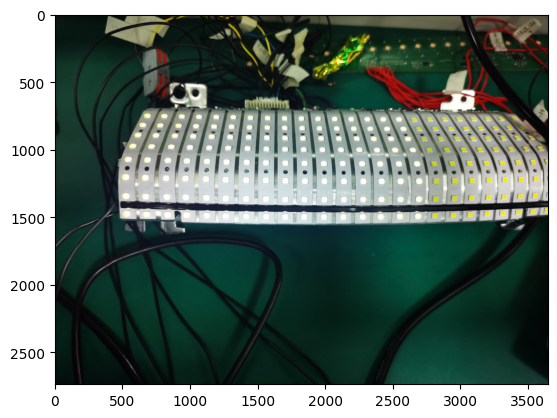

In [9]:

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()
showpic(img)


In [10]:
# showpicRGB(img)

In [11]:
height,width,channels=img.shape
heightImg = height
widthImg  = width
print(widthImg,height)

3648 2736


In [12]:
# imgBlank = np.zeros((heightImg,widthImg, 3), np.uint8)
# showpic(imgBlank)

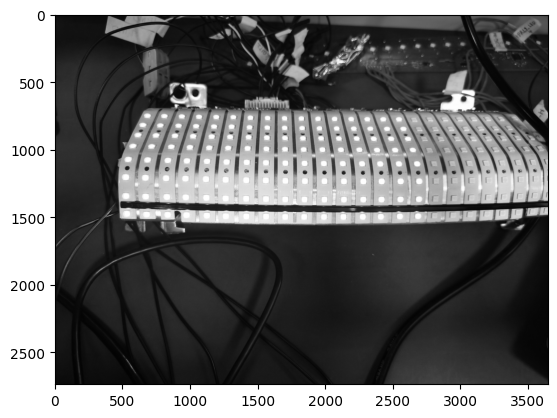

In [13]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# 转灰度图
showpic(imgGray)

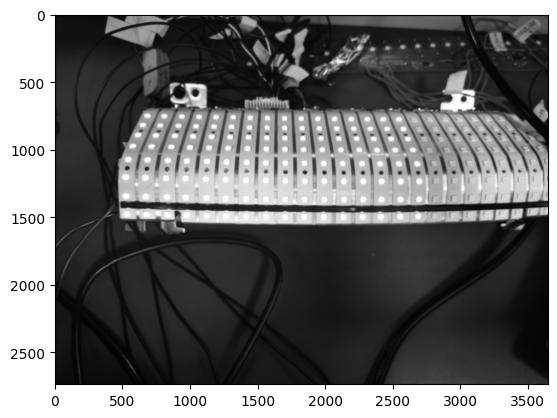

In [14]:
# imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # 
imgBlur = cv2.GaussianBlur(imgGray, (11, 11), 5) # 
showpic(imgBlur)

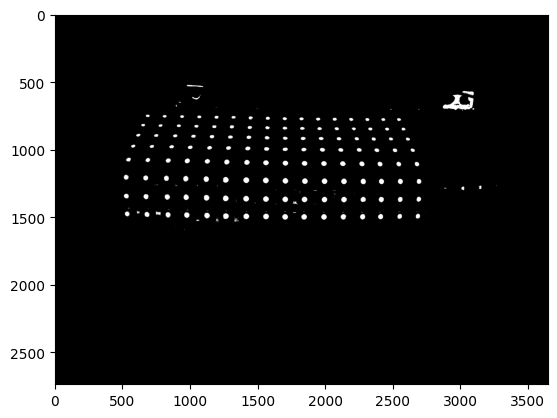

In [15]:
# kernel = np.ones((5,5)) # 计算盒
# imgDial = cv2.dilate(imgCanny,kernel,iterations=3) #腐蚀
# imgThre = cv2.erode(imgDial,kernel,iterations=2) # 膨胀
# imgThreshold = cv2.Canny(imgBlur,100,150)# 边沿检测
ret, binary = cv2.threshold(imgGray, 253, 255, cv2.THRESH_BINARY)
# ret, binary = cv2.threshold(imgGray, 127, 255, cv2.THRESH_BINARY)
showpic(binary)

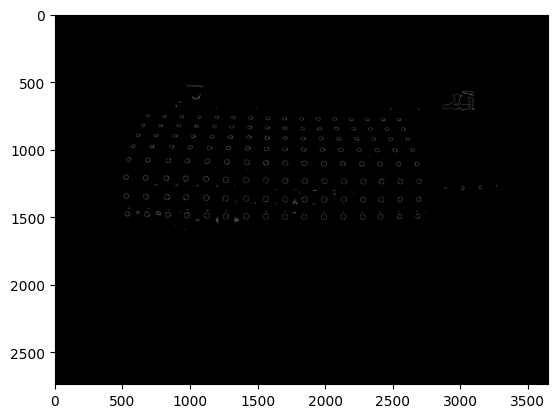

In [16]:
imgThreshold = cv2.Canny(binary,100,200)# 边沿检测
showpic(imgThreshold)
# ret, binary2 = cv2.threshold(imgGray, 127, 255, cv2.THRESH_BINARY)
# showpic(binary2)

In [33]:
8*24*2

384

In [17]:
contours,hiearchy = cv2.findContours(imgThreshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) # 查找轮廓

In [34]:
areaList=[]
for i in contours: # 遍历所有轮廓
    area = cv2.contourArea(i) # 轮廓面积
    # print(area)
    if area>2 and area<100:
        areaList.append(area)
print(areaList.sort())
print(len(areaList),max(areaList),min(areaList))

None


In [ ]:
# 创建一张黑图， 位运算，copyto，生成roi区域
'''
def brightness1( im_file ):   im = Image.open(im_file).convert('L')   stat = ImageStat.Stat(im)   return stat.mean[0]

print(brightness1('c:\\meiping1.png'))


def brightness2( im_file ):   im = Image.open(im_file).convert('L')   stat = ImageStat.Stat(im)   return stat.rms[0]
print(brightness2('c:\\meiping1.png'))



'''


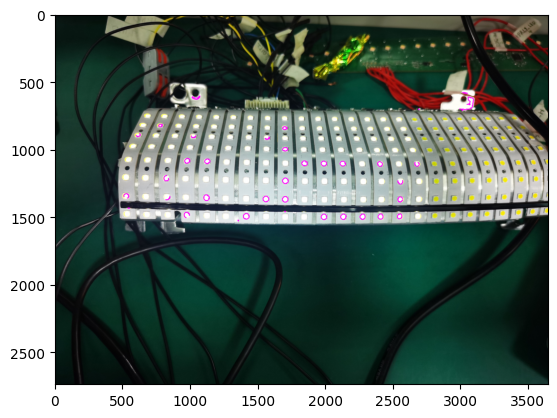

In [39]:
contours2=[]
for i in contours: # 遍历所有轮廓
    area = cv2.contourArea(i) # 轮廓面积
    # print(area)
    if area>18 and area<40:
        contours2.append(i)
disImg=img.copy()
cv2.drawContours(disImg, contours2, -1, (255, 0, 255), 5) # DRAW ALL DETECTED CONTOURS
showpic(disImg)

[15.0,
 15.0,
 15.5,
 16.5,
 16.5,
 18.0,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 19.0,
 19.5,
 20.0,
 20.0,
 21.0,
 21.0,
 21.5,
 22.0,
 22.5,
 23.0,
 23.0,
 23.5,
 23.5,
 24.0,
 24.0,
 24.0,
 25.0,
 25.5,
 26.0,
 26.5,
 27.0,
 28.0,
 28.5,
 29.5,
 29.5,
 30.0,
 31.5,
 33.0,
 33.0,
 34.5,
 36.5,
 38.5,
 40.0,
 43.5,
 44.0,
 48.0,
 105.5,
 436.5,
 459.5,
 462.5,
 507.0,
 513.0,
 527.0,
 536.5,
 549.5,
 589.5,
 617.0,
 626.5,
 643.0,
 709.0,
 772.0,
 782.5,
 978.0,
 1106.5,
 1124.0,
 1164.0,
 1241.5,
 1262.0,
 1286.0,
 1287.5,
 1296.0,
 1298.5,
 1313.5,
 1316.0,
 1321.0,
 1329.5,
 1341.0,
 1390.5,
 1397.0,
 1404.0]

In [19]:
print(len(contours),contours)

961 (array([[[ 958, 1594]],

       [[ 958, 1596]]], dtype=int32), array([[[ 958, 1589]],

       [[ 957, 1590]],

       [[ 957, 1592]],

       [[ 956, 1593]],

       [[ 956, 1596]],

       [[ 956, 1593]],

       [[ 957, 1592]],

       [[ 957, 1590]],

       [[ 958, 1589]],

       [[ 959, 1590]],

       [[ 959, 1591]],

       [[ 959, 1590]]], dtype=int32), array([[[ 893, 1565]],

       [[ 892, 1566]],

       [[ 892, 1569]],

       [[ 894, 1569]],

       [[ 894, 1566]]], dtype=int32), array([[[1207, 1540]],

       [[1208, 1540]]], dtype=int32), array([[[1207, 1538]],

       [[1209, 1538]]], dtype=int32), array([[[1201, 1537]],

       [[1201, 1539]],

       [[1202, 1539]],

       [[1203, 1540]],

       [[1203, 1541]],

       [[1205, 1541]],

       [[1205, 1540]],

       [[1203, 1538]],

       [[1203, 1537]]], dtype=int32), array([[[1349, 1534]],

       [[1349, 1536]],

       [[1350, 1536]],

       [[1351, 1535]],

       [[1350, 1534]]], dtype=int32), array([[[

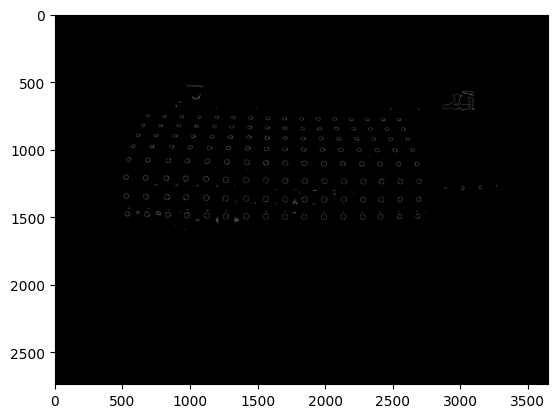

In [34]:
imgThreshold = cv2.Canny(binary,180,200)
showpic(imgThreshold)

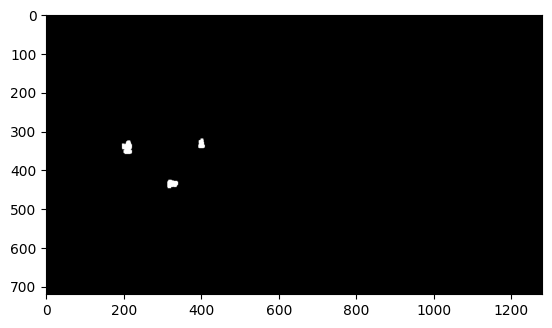

In [192]:
kernel = np.ones((3, 3))
imgDial = cv2.dilate(binary, kernel, iterations=0) # APPLY DILATION 膨胀
imgerod = cv2.erode(imgDial, kernel, iterations=1)  # APPLY EROSION 腐蚀
imgDial = cv2.dilate(imgerod, kernel, iterations=3) # APPLY DILATION 膨胀
img_end=imgDial
showpic(img_end)

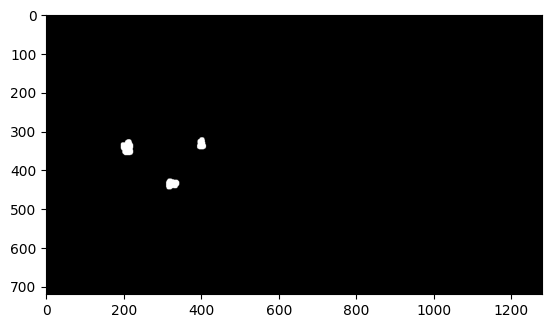

In [193]:
# contours, hierarchy = cv2.findContours(img_end, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 找轮廓
contours, hierarchy = cv2.findContours(img_end, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # 找轮廓
cv2.drawContours(img_end, contours, -1, (255, 255, 255), 5) # DRAW ALL DETECTED CONTOURS
showpic(img_end)

In [194]:
# print(contours)
print(len(contours))

3


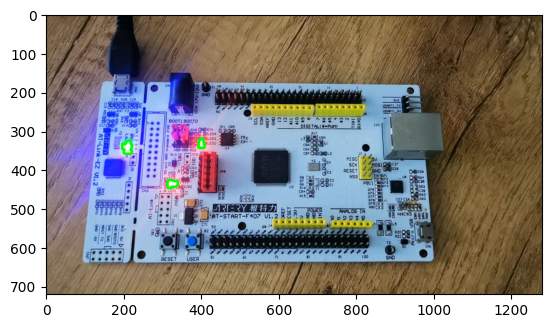

In [195]:
# cv2.drawContours(img_end, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS
cv2.drawContours(img, contours, -1, (0, 255, 0), 5,2) # DRAW ALL DETECTED CONTOURS
showpic(img)